Social Media Sentiment Analysis 


## Importing the necessary packages 

In [268]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

Train dataset used for our analysis

In [269]:
train = pd.read_csv('train.csv')

#### We make a copy of training data so that even if we have to make any changes in this dataset we would not lose the original dataset.

In [270]:
train_original=train.copy()

#### Here we see that there are a total of 31692 tweets in the training dataset

In [271]:
train.shape

(31962, 3)

In [272]:
train_original

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


## Test dataset used for our analysis

In [273]:
test = pd.read_csv('test.csv')

#### We make a copy of test data so that even if we have to make any changes in this dataset we would not lose the original dataset.

In [274]:
test_original=test.copy()

#### Here we see that there are a total of 17197 tweets in the test dataset

In [275]:
test.shape

(17197, 2)

In [276]:
test_original

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


### We combine Train and Test datasets for pre-processing stage

In [277]:
import pandas as pd

# Assuming train and test are DataFrames
combined = pd.concat([train, test], ignore_index=True, sort=True)


In [278]:
combined = pd.concat([train, test], ignore_index=True, sort=True)
combined.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [279]:
combined = pd.concat([train, test], ignore_index=True, sort=True)
combined.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


# Data Pre-Processing

##  Removing Twitter Handles (@user)

In [280]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text
        

In [281]:
import numpy as np

# Assuming remove_pattern is defined elsewhere
combined['Tidy_Tweets'] = np.vectorize(remove_pattern)(combined['tweet'], "@[\w]*")
combined.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## Removing Punctuations, Numbers, and Special Characters

In [282]:
import numpy as np

# Assuming remove_pattern is defined elsewhere
combined['Tidy_Tweets'] = np.vectorize(remove_pattern)(combined['tweet'], "@[\w]*")
combined.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


## Removing Short Words


In [283]:
combined['Tidy_Tweets'] = combined['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
combined.head(10)


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fare talking before they leave. cha...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams.ð¯ can't think a...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,won!!! love land!!! #allin #cavs #champions #c...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here it's #gr8


 ## Tokenization

In [284]:
tokenized_tweet = combined['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()


0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: Tidy_Tweets, dtype: object

## Stemming

In [285]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: Tidy_Tweets, dtype: object

#### Now let’s stitch these tokens back together.

In [286]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combined['Tidy_Tweets'] = tokenized_tweet
combined.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: societi #motiv


# Visualization from Tweets


## WordCloud

#### Importing Packages necessary for generating a WordCloud

In [287]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

 #### Store all the words from the dataset which are non-racist/sexist

In [288]:
all_words_positive = ' '.join(text for text in combined['Tidy_Tweets'][combined['label']==0])

#### We can see most of the words are positive or neutral. With happy, smile, and love being the most frequent ones. Hence, most of the frequent words are compatible with the sentiment which is non racist/sexists tweets. 

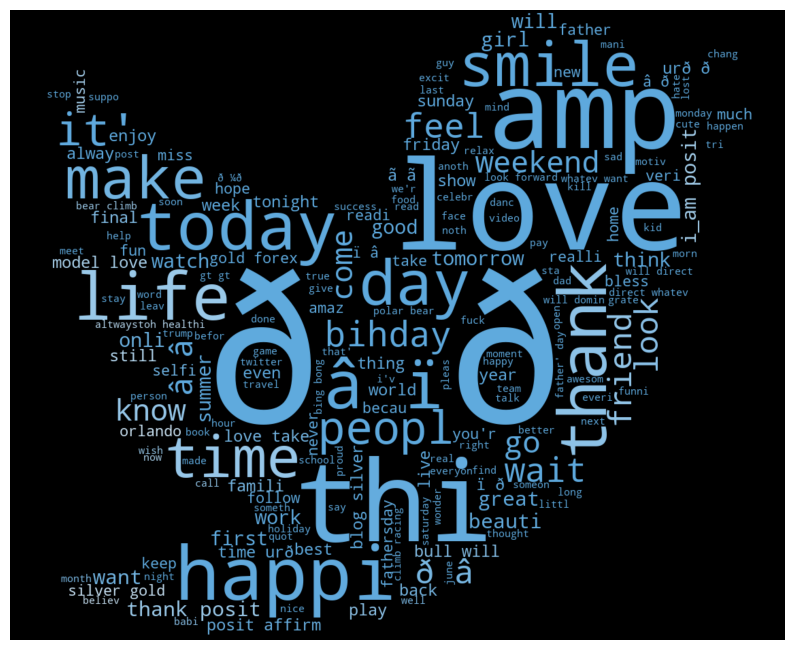

In [289]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

#### Store all the words from the dataset which are racist/sexist

In [290]:
all_words_negative = ' '.join(text for text in combined['Tidy_Tweets'][combined['label']==1])

#### As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on.

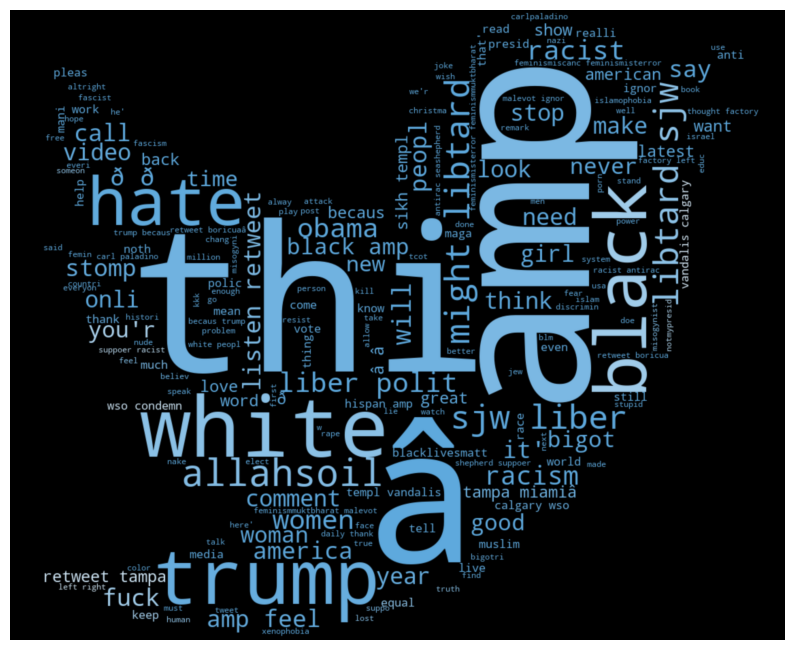

In [291]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

# Understanding the impact of Hashtags on tweets sentiment

### Function to extract hashtags from tweets

In [292]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

#### A nested list of all the hashtags from the positive reviews from the dataset

In [293]:
ht_positive = Hashtags_Extract(combined['Tidy_Tweets'][combined['label']==0])

#### Here we unnest the list 

In [294]:
ht_positive_unnest = sum(ht_positive,[])

#### A nested list of all the hashtags from the negative reviews from the dataset

In [295]:
ht_negative = Hashtags_Extract(combined['Tidy_Tweets'][combined['label']==1])

#### Here we unnest the list

In [296]:
ht_negative_unnest = sum(ht_negative,[])

## Plotting BarPlots

![plot](https://www.mathworks.com/help/examples/graphics/win64/SingleDataSeriesExample_01.png)

### For Positive Tweets in the dataset

#### Counting the frequency of the words having Positive Sentiment 

In [297]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1576, 'posit': 905, 'smile': 636, 'healthi': 558, 'thank': 526, 'fun': 434, 'affirm': 422, 'life': 399, 'model': 374, 'summer': 362, ...})

#### Creating a dataframe for the most frequently used words in hashtags

In [298]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [299]:
df_positive.head(10)

,Hashtags,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374
5,motiv,195
6,allshowandnogo,1
7,school,27
8,exam,8
9,hate,26


#### Plotting the barplot for the 10 most frequent words used for hashtags 

In [300]:
df_positive_plot = df_positive.nlargest(20,columns='Count') 

       Hashtags  Count
33         love   1576
41        posit    905
60        smile    636
161     healthi    558
40        thank    526
180         fun    434
95       affirm    422
396        life    399
4         model    374
299      summer    362
369        cute    356
21         blog    355
94         i_am    352
418      beauti    347
475  fathersday    332
328       happi    328
228      friend    319
22       silver    299
23         gold    298
103      bihday    283
Hashtags    object
Count        int64
dtype: object


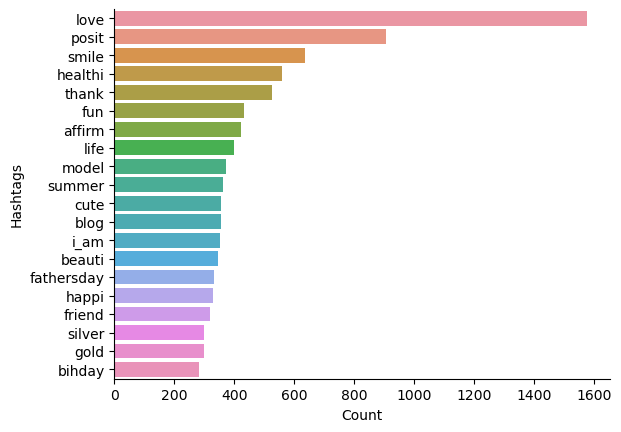

In [301]:
# Check DataFrame contents
print(df_positive_plot)

# Check data types and formatting
print(df_positive_plot.dtypes)

# Plotting code
sns.barplot(data=df_positive_plot, y='Hashtags', x='Count')
sns.despine()


### For Negative Tweets in the dataset

#### Counting the frequency of the words having Negative Sentiment 

In [302]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [303]:
word_freq_negative

FreqDist({'trump': 133, 'polit': 94, 'allahsoil': 92, 'liber': 79, 'libtard': 77, 'sjw': 75, 'retweet': 57, 'black': 46, 'miamiâ': 38, 'hate': 36, ...})

#### Creating a dataframe for the most frequently used words in hashtags

In [304]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [305]:
df_negative.head(10)

,Hashtags,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,6
9,xenophobia,12


#### Plotting the barplot for the 10 most frequent words used for hashtags 

In [306]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 

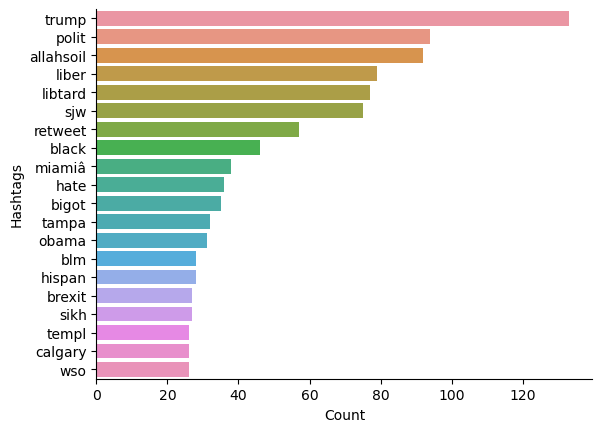

In [307]:
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

# Extracting Features from cleaned Tweets

### Bag-of-Words Features

In [308]:
# Join the words within each document to form a single string
combined['Tidy_Tweets'] = combined['Tidy_Tweets'].apply(lambda x: ' '.join(x.split()))

# Check the updated content of the 'Tidy_Tweets' column
print(combined['Tidy_Tweets'])



0        when father dysfunct selfish drag kid into dys...
1        thank #lyft credit can't caus they don't offer...
2                                      bihday your majesti
3        #model love take with time urð±!!! ððð...
4                               factsguide: societi #motiv
                               ...                        
49154    thought factory: left-right polarisation! #tru...
49155    feel like mermaid ð #hairflip #neverreadi #...
49156    #hillari #campaign today #ohio((omg)) &amp; us...
49157    happy, work conference: right mindset lead cul...
49158    song glad" free download! #shoegaz #newmus #ne...
Name: Tidy_Tweets, Length: 49159, dtype: object


In [309]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Initialize CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# Fit and transform the preprocessed text
bow = bow_vectorizer.fit_transform(combined['Tidy_Tweets'])

# Convert to DataFrame
df_bow = pd.DataFrame(bow.todense())

# Display the DataFrame
print(df_bow)


       0    1    2    3    4    5    6    7    8    9    ...  990  991  992  \
0        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49154    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
49155    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
49156    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
49157    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
49158    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       993  994  995  996  997  998  999  
0       

### TF-IDF Features

In [310]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combined['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Applying Machine Learning Models

### Using the features from Bag-of-Words Model for training set

In [311]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Using features from TF-IDF for training set

In [312]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Splitting the data into training and validation set

In [313]:
from sklearn.model_selection import train_test_split

#### Bag-of-Words Features

In [314]:
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

#### Using TF-IDF features

In [315]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)


## Logistic Regression

In [316]:
from sklearn.linear_model import LogisticRegression

In [317]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

### Using Bag-of-Words Features 

In [318]:
# Fitting the Logistic Regression Model
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [319]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.88522656e-01, 1.14773438e-02],
       [9.99902158e-01, 9.78419715e-05],
       [9.03848760e-01, 9.61512398e-02],
       ...,
       [7.06602565e-01, 2.93397435e-01],
       [9.43206058e-01, 5.67939417e-02],
       [9.63526312e-01, 3.64736878e-02]])

#### Calculating the F1 score

In [320]:
from sklearn.metrics import f1_score

In [321]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(int)

prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.584070796460177

### Using TF-IDF Features

In [322]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [323]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.98359438, 0.01640562],
       [0.98185847, 0.01814153],
       [0.91844664, 0.08155336],
       ...,
       [0.96093067, 0.03906933],
       [0.93586749, 0.06413251],
       [0.97920102, 0.02079898]])

#### Calculating the F1 score

In [324]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(int)

prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.5861486486486487

## XGBoost

## Decision Tree

In [325]:
from sklearn.tree import DecisionTreeClassifier

In [326]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

### Using Bag-of-Words Features

In [327]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [328]:
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [329]:
# Assuming dct_bow contains your predicted probabilities and y_valid_bow contains your true labels

# Thresholding probabilities to convert to binary predictions
dct_bow_binary = (dct_bow >= 0.3).astype(int)

# Calculating F1 score
dct_score_bow = f1_score(y_valid_bow, dct_bow_binary)

# Print or use the dct_score_bow as needed
print(dct_score_bow)


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

### Using TF-IDF Features

In [330]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [331]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#### Calculating F1 Score

In [332]:
# Assuming dct_tfidf contains your predicted probabilities and y_valid_tfidf contains your true labels

# Thresholding probabilities to convert to binary predictions
dct_tfidf_binary = (dct_tfidf >= 0.3).astype(int)

# Calculating F1 score
dct_score_tfidf = f1_score(y_valid_tfidf, dct_tfidf_binary)

# Print or use the dct_score_tfidf as needed
print(dct_score_tfidf)


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

# Model Comparison

In [333]:
Algo=['LogisticRegression(Bag-of-Words)','DecisionTree(Bag-of-Words)','LogisticRegression(TF-IDF)','DecisionTree(TF-IDF)']

In [334]:
import pandas as pd

Algo = ['LogisticRegression(Bag-of-Words)', 'DecisionTree(Bag-of-Words)', 'LogisticRegression(TF-IDF)', 'DecisionTree(TF-IDF)']
score = [0.584071, 0.502469, 0.586149, 0.539732]

# Extend the lists to match the length of the index
Algo.extend([''] * (6 - len(Algo)))
score.extend([None] * (6 - len(score)))

# Create DataFrame
compare = pd.DataFrame({'Model': Algo, 'F1_Score': score}, index=[i for i in range(1, 7)])

# Remove rows with empty Model
compare = compare.dropna()

# Display DataFrame
print(compare)

                              Model  F1_Score
1  LogisticRegression(Bag-of-Words)  0.584071
2        DecisionTree(Bag-of-Words)  0.502469
3        LogisticRegression(TF-IDF)  0.586149
4              DecisionTree(TF-IDF)  0.539732


In [335]:
compare.T

,1,2,3,4
Model,LogisticRegression(Bag-of-Words),DecisionTree(Bag-of-Words),LogisticRegression(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.584071,0.502469,0.586149,0.539732


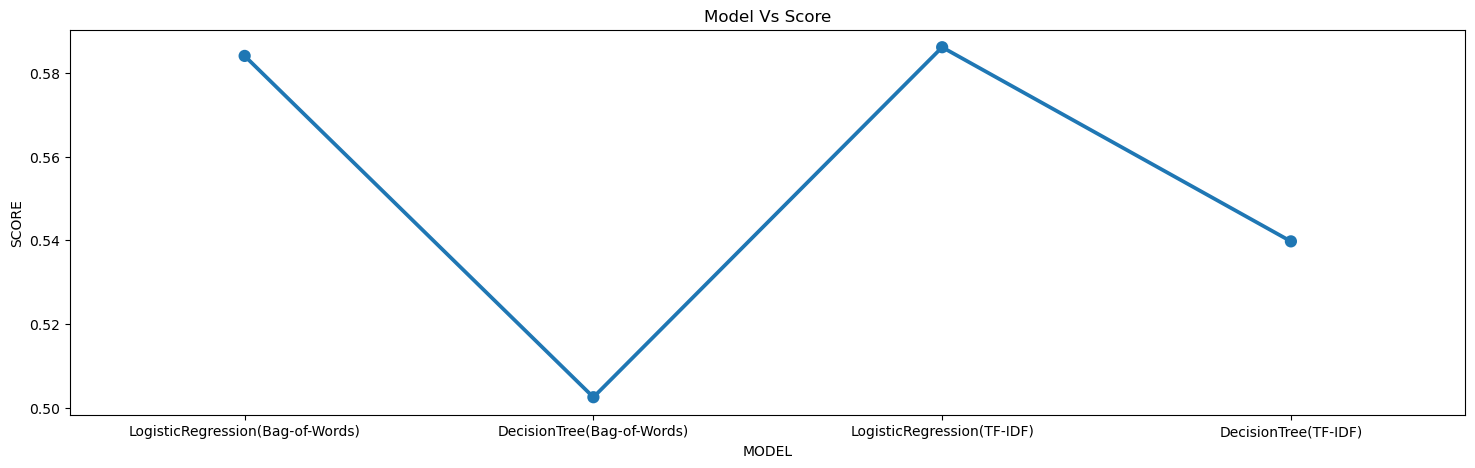

In [336]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare)

plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

## Using the best possible model to predict for the test data

#### From the above comaprison graph we can see that Logistic Regression trained using TF-IDF features gives us the best performance

In [337]:
test_tfidf = tfidf_matrix[31962:]

In [338]:
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3

test_pred_int = test_pred_int.astype(int)

test['label'] = test_pred_int

submission = test[['id','label']]

submission.to_csv('result.csv', index=False)

### Test dataset after prediction

In [339]:
res = pd.read_csv('result.csv')

In [340]:
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


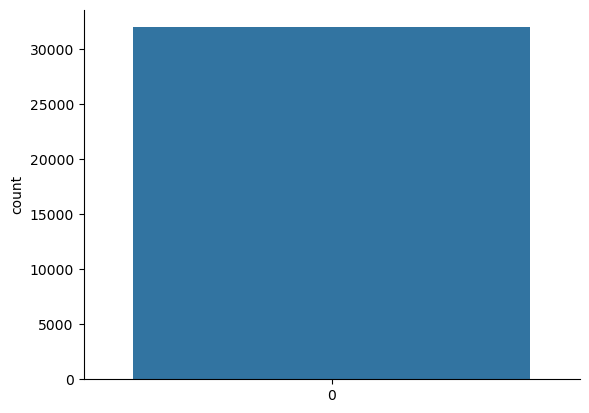

In [341]:
sns.countplot(train_original['label'])
sns.despine()